# Research Grant Council Database

## ER Diagram
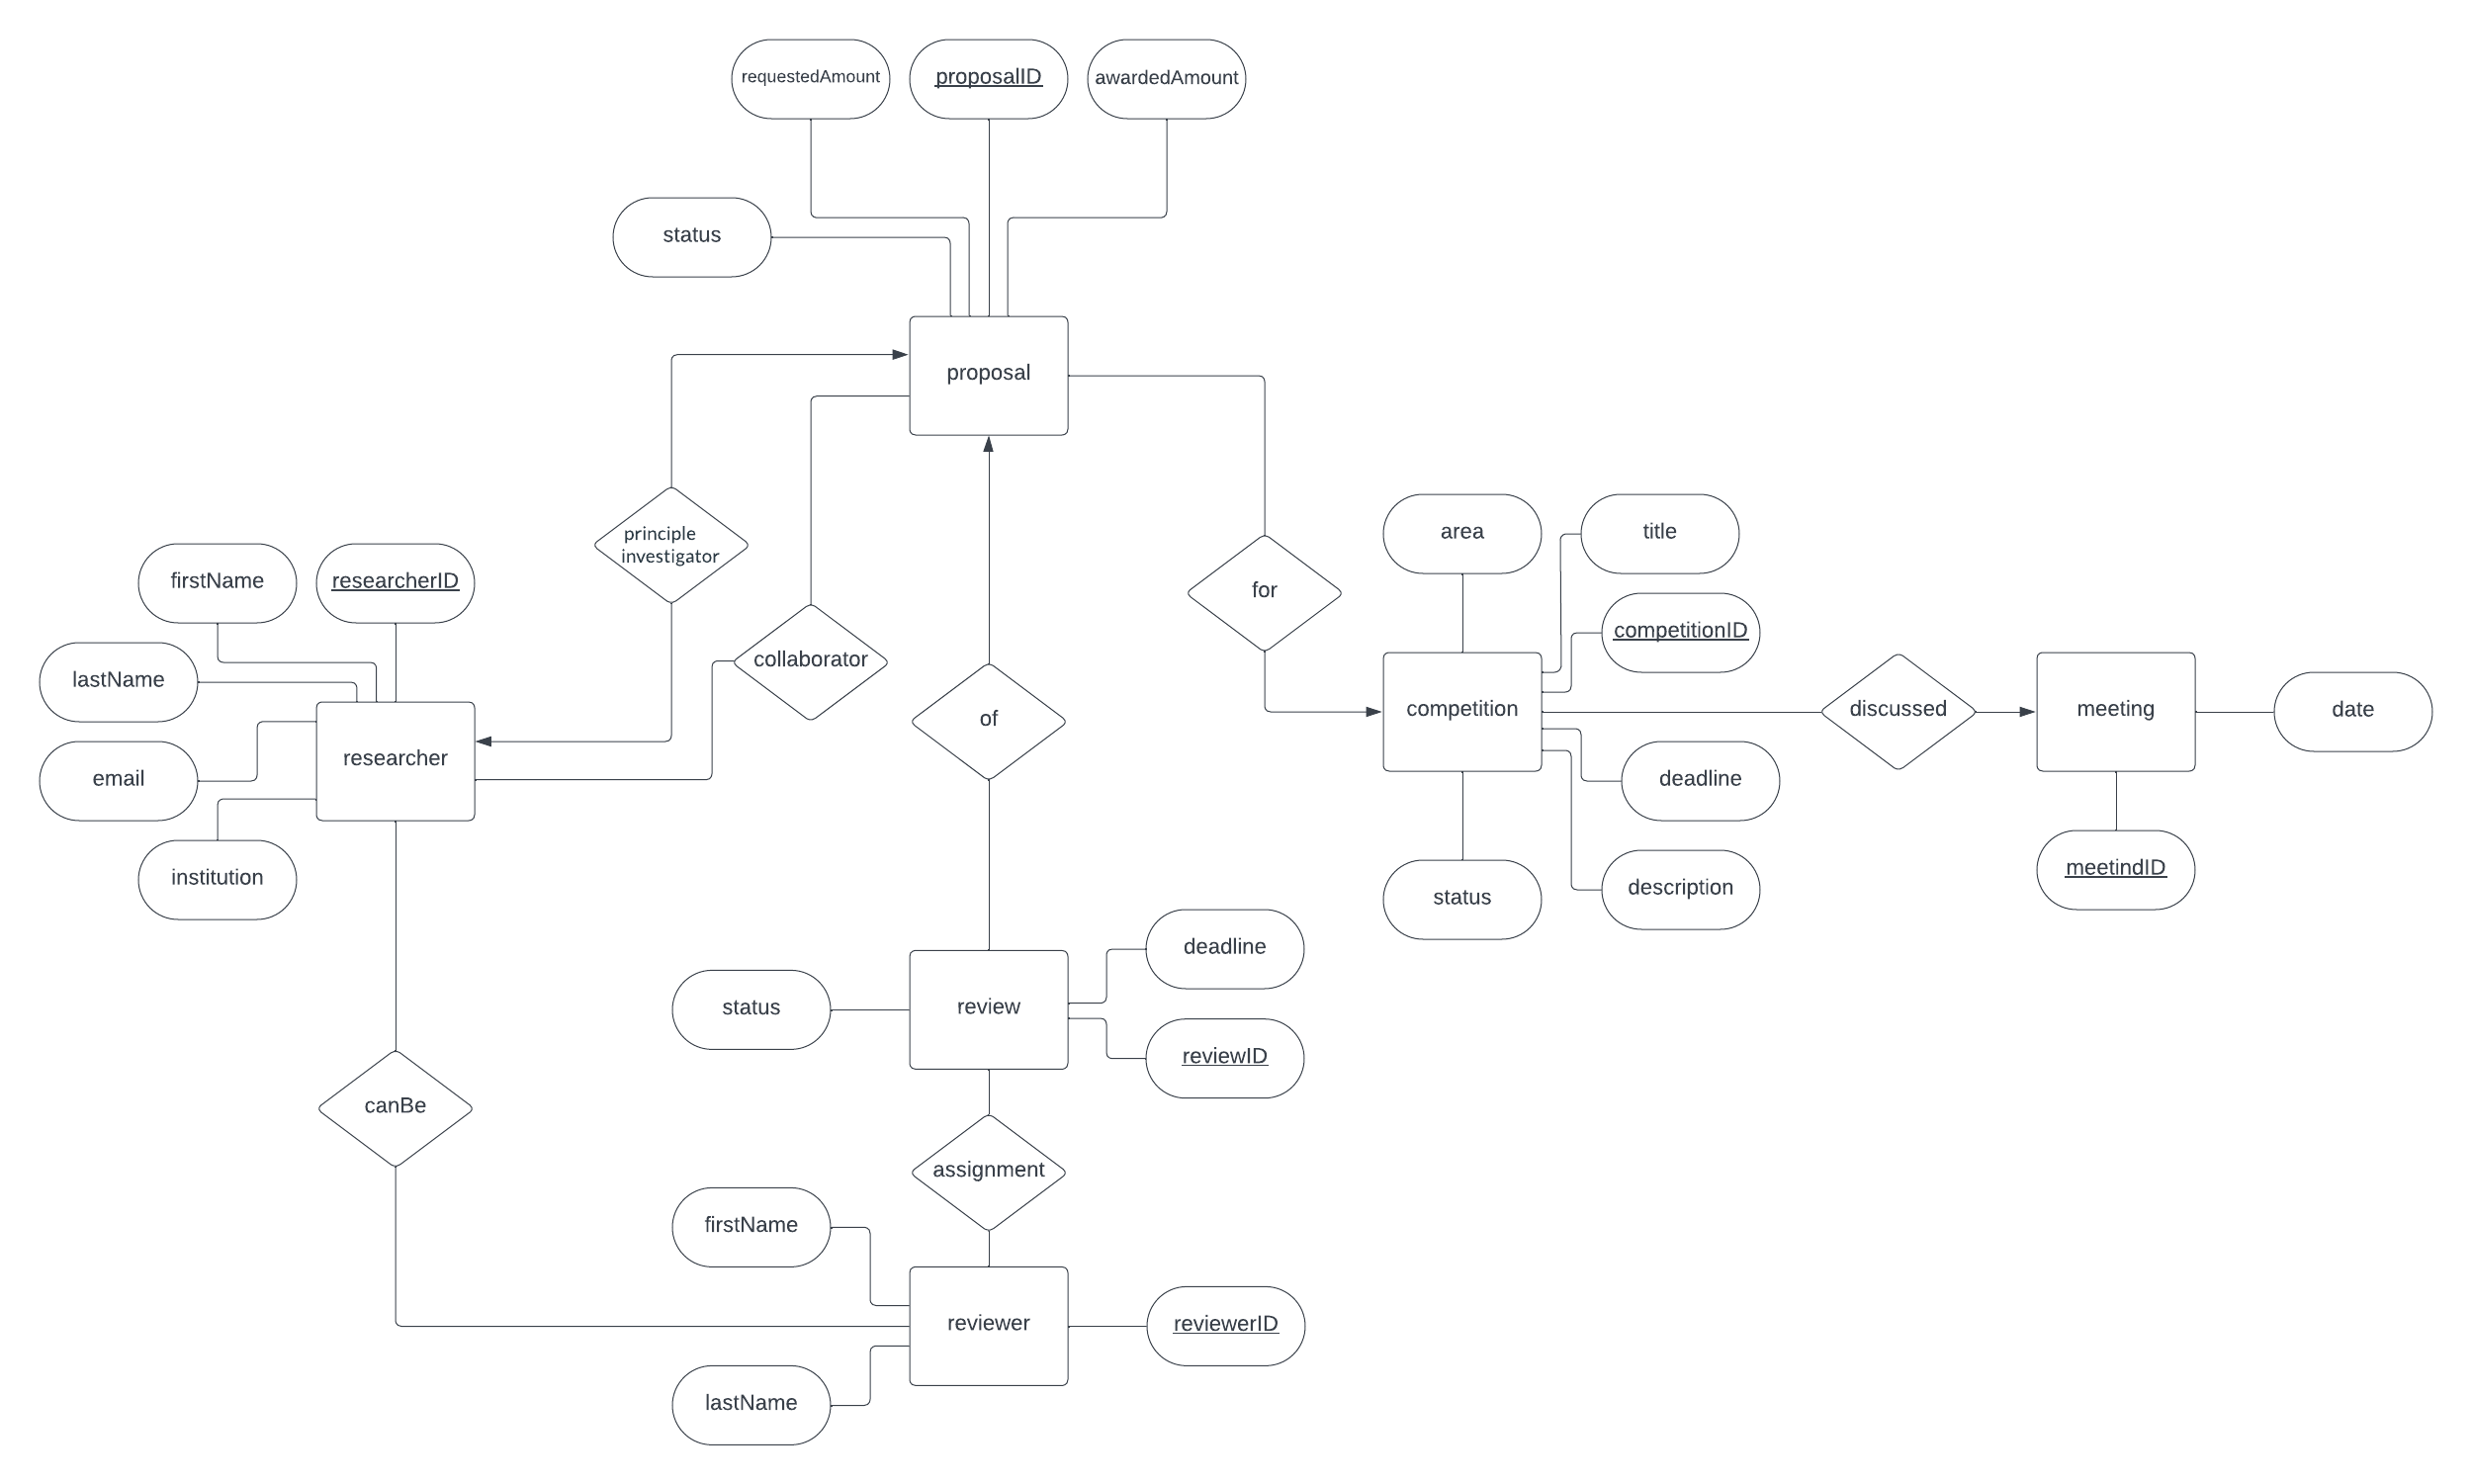

## SQL Schema

- Researcher = {<span style="text-decoration:underline">researcherID</span>, firstName, lastName, email, institution}
- Collaborator = {<span style="text-decoration:underline">collaboratorID</span><span><sup>FK-Researcher</sup>, <span style="text-decoration:underline">proposalID</span><span><sup>FK-Proposal</sup>}
- Proposal = {<span style="text-decoration:underline">proposalID</span>, requestedAmount, awardedAmount, status, principleInvestigatorID<sup>FK-Researcher</sup>, competitionID<sup>FK-Competition</sup>}
- Review = {<span style="text-decoration:underline">reviewID</span>, status, deadline, proposalID<sup>FK-Proposal</sup>}
- Reviewer = {<span style="text-decoration:underline">reviewerID</span>, firstName, lastName, researcherID<sup>FK-Researcher</sup>}
- Assignment = {<span style="text-decoration:underline">reviewerID</span><span><sup>FK-Reviewer</sup>, <span style="text-decoration:underline">ReviewID</span><span><sup>FK-Review</sup>}
- Competition = {<span style="text-decoration:underline">competitionID</span>, area, title, deadline, description, status, meetingID<sup>FK-Meeting</sup>}
- Meeting = {<span style="text-decoration:underline">MeetingID</span>, date}

## Schema Creation

### Execute the next two cells

In [1]:
%reload_ext sql

In [2]:
%sql sqlite:///Research-Grant-Council-Database.db

'Connected: @Research-Grant-Council-Database.db'

### Queries

#### Researcher

In [3]:
%%sql

CREATE TABLE IF NOT EXISTS Researcher (
    researcherID INTEGER Identity(1,1) PRIMARY KEY,
    firstName VARCHAR(20) NOT NULL,
    lastName VARCHAR(20) NOT NULL,
    email VARCHAR(100) NOT NULL UNIQUE,
    institution VARCHAR(100) NOT NULL
);

 * sqlite:///Research-Grant-Council-Database.db
Done.


[]

#### Collaborator

In [4]:
%%sql

CREATE TABLE IF NOT EXISTS Collaborator (
    collaboratorID INTEGER,
    proposalID INTEGER,
    FOREIGN KEY (collaboratorID) REFERENCES Researcher(researcherID),
    FOREIGN KEY (proposalID) REFERENCES Proposal(proposalID),
    PRIMARY KEY (collaboratorID, proposalID)
);

 * sqlite:///Research-Grant-Council-Database.db
Done.


[]

#### Proposal

In [5]:
%%sql

CREATE TABLE IF NOT EXISTS Proposal (
    proposalID INTEGER Identity(1,1) PRIMARY KEY,
    requestedAmount REAL NOT NULL,
    awardedAmount REAL,
    status VARCHAR(20) NOT NULL CHECK(status IN ('submitted','awarded','not awarded')),
    principleInvestigatorID INTEGER,
    competitionID INTEGER,
    FOREIGN KEY (principleInvestigatorID) REFERENCES Researcher(researcherID),
    FOREIGN KEY (competitionID) REFERENCES Competition(competitionID)
);

 * sqlite:///Research-Grant-Council-Database.db
Done.


[]

#### Review

In [6]:
%%sql

CREATE TABLE IF NOT EXISTS Review (
    reviewID INTEGER Identity(1,1) PRIMARY KEY,
    status VARCHAR(20) NOT NULL CHECK(status IN ('submitted','not submitted')),
    deadline DATE NOT NULL,
    proposalID INTEGER,
    FOREIGN KEY (proposalID) REFERENCES Proposal(proposalID)
);

 * sqlite:///Research-Grant-Council-Database.db
Done.


[]

#### Reviewer

In [7]:
%%sql

CREATE TABLE IF NOT EXISTS Reviewer (
    reviewerID INTEGER Identity(1,1) PRIMARY KEY,
    firstName VARCHAR(20) NOT NULL,
    lastName VARCHAR(20) NOT NULL,
    researcherID INTEGER,
    FOREIGN KEY (researcherID) REFERENCES Researcher(researcherID)
);

 * sqlite:///Research-Grant-Council-Database.db
Done.


[]

#### Assignment

In [8]:
%%sql

CREATE TABLE IF NOT EXISTS Assignment (
    reviewerID INTEGER,
    reviewID INTEGER,
    FOREIGN KEY (reviewerID) REFERENCES Reviewer(reviewerID),
    FOREIGN KEY (reviewID) REFERENCES Review(reviewID),
    PRIMARY KEY (reviewerID, reviewID)
);

 * sqlite:///Research-Grant-Council-Database.db
Done.


[]

#### Competition

In [9]:
%%sql

CREATE TABLE IF NOT EXISTS Competition (
    competitionID INTEGER Identity(1,1) PRIMARY KEY,
    area VARCHAR(50) NOT NULL,
    title VARCHAR(100) NOT NULL,
    deadline DATE NOT NULL,
    description TEXT NOT NULL,
    status VARCHAR(20) NOT NULL CHECK(status IN ('open', 'closed')),
    meetingID INTEGER,
    FOREIGN KEY (meetingID) REFERENCES Meeting(meetingID)
);

 * sqlite:///Research-Grant-Council-Database.db
Done.


[]

#### Meeting 

In [10]:
%%sql

CREATE TABLE IF NOT EXISTS Meeting (
    meetingID INTEGER Identity(1,1) PRIMARY KEY,
    date DATE NOT NULL
);

 * sqlite:///Research-Grant-Council-Database.db
Done.


[]

### Populate Researcher

In [13]:
%%sql
INSERT INTO Researcher (firstName, lastName, email, institution)VALUES ("Stacy", "Berman", "jovan.hetting@hotmail.com", "University of California, Los Angeles"), 
("Dennis", "Vall", "mabel1987@yahoo.ca", "University Texas Austin"),
("Mary", "Jones", "greta19962017@gmail.com", "University of Oklahoma"),
("Patsy", "Chisholm", "PatsyLChisholm@teleworm.us", "University of Washington"),
("Caroline", "Campunzano", "andreanne1993@hotmail.com", "University of Oregon"),
("Everett", "Victor", "arjun2003@hotmail.com", "University of Pennsylvania"),
("Deborah"," Butea", "chase.schul@gmail.com", "Princeton University"),
("Sid", "Jewell", "wilhelm1990@hotmail.com", "Harvard University"),
("Marueen", "Miles", "karelle.muell@yahoo.com", "Standford Universty"),
("Walter", "Nightingale", "clark1996@yahoo.com", "Massachusetts Institute of Technology"),
("Randolph", "Gibson", "sonia_nikola@hotmail.com", "Yale University"),
("Josh", "Peters", "joshpeters13@hotmail.com", "McGill University"),
("Karen", "Rogers", "karenrogers7653@gmail.com", "University of British Columbia"),
("Peggy", "Letson", "peggyletson19@gmail.com", "University of Toronto"),
("Lanson", "Wong", "lansonwong43@gmail.com", "University of Alberta"),
("Wilson", "Yung", "wilsonyung4930@hotmail.com", "University of Waterloo"),
("Anson", "Chow", "ansonchow3941@gmail.com", "University of Saskatchewan"),
("Cayden", "Leong", "caydenleong74@yahoo.com", "University of Ottawa"),
("Miriam", "Kim", "miriamkim2341@gmail.com", "University of Guelph"),
("Jeff", "Lu", "jefflu123@gmail.com", "University of California San Diego"),
("Sunny","Ho","sunnyho29@yahoo.com", "California State University"),
("Lyndia","Hero","lyndiahero064@hotmail.com", "")


 * sqlite:///Research-Grant-Council-Database.db
19 rows affected.


[]

In [ ]:
### Populate Collaborator

In [ ]:
%%sql
INSERT INTO Collaborator Values ()

### Populate Proposal

In [16]:
%%sql
INSERT INTO Proposal (requestedAmount, awardedAmount, status, principleInvestigatorID, competitionID)
VALUES (5000,5000,'awarded',1,1),
(15000,10000,'awarded',2,1),
(2500,1000,'awarded',3,2),
(25000,25000,'awarded',4,2),
(1500,2500,'awarded',5,3),
(10000,5000,'awarded',6,3),
(10000,10000,'awarded',7,4),
(5000,0,'not awarded',17,4),
(17000,0,'not awarded',18,4),
(7000,0,'submitted',8,5),
(10000,10000,'awarded',19,5),
(17500,0,'not awarded',20,5),
(5000,0,'not awarded',9,6),
(15000,10000,'awarded',21,6),
(30000,0,'not awarded',10,7),
(10000, 0 'submitted',11,7)
(15000, 5000, 'awarded',12,8),
(5000, 0, 'not awarded',13,8),
(2500,2500,'awarded',14,9),
(20000,10000,'awarded',15,9),
(18500,15000,'awarded',16,10),
(12500,0,'not awarded',22,10);

 * sqlite:///Research-Grant-Council-Database.db
10 rows affected.


[]

### Populate Review

In [18]:
%%sql
INSERT INTO Review (status,deadline,proposalID) VALUES ('submitted','10/30/2023',1),
('submitted','5/23-2023',2),
('submitted','7/1-2023',3),
('submitted','1/31-2023',4),
('submitted','4/15-2023',5),
('submitted','8/18-2023',6),
('submitted','2/17-2023',7),
('submitted','1/8-2023',8),
('submitted','3/12-2023',9),
('submitted','3/19-2023',10);


 * sqlite:///Research-Grant-Council-Database.db
10 rows affected.


[]

### Populate Reviewer 

In [19]:
%%sql
INSERT INTO Reviewer (firstName, lastName, researcherID) VALUES ("Hayden","Shen",NULL),
("Jonathan","Yang",NULL),
("Alan","Poy",NULL),
("John","Wang",NULL),
("Hassan","Mohammad",NULL),
("Kathy","Means",NULL),
("Tammy","Smith",NULL),
("Timothy","Grube",NULL),
("Beverly","Clark",NULL),
("Peter","Snider",NULL),
("Bonnie","Watkins",NULL),
("Charles","McNeal",NULL),
("Jacky","Tran",NULL),
("Jones","Flemming",NULL),
("Frank","Smith",NULL),
("Harold","Jenkins",NULL),
("Belbert","Springer",NULL),
("Alisa","Hunter",NULL),
("Dianne","Johnson",NULL),
("Damon","Green",NULL),
("Anson","Chow",17),
("Josh","Peters",12);


 * sqlite:///Research-Grant-Council-Database.db
22 rows affected.


[]

### Populate Assignment 

In [ ]:
%%sql
INSERT INTO Assignment (reviewerID,reviewID)
VALUES (1,1),(2,1),(3,1)(4,2),(5,2),(6,3)(7,4)(8,4)(9,5),(10,5),(11,5),(12,6),(13,6),(14,6),(15,7),(16,8),(17,8),
(18,8),(19,9),(20,10),(21,10),(22,10);

### Populate Competition

In [ ]:
%%sql
INSERT INTO Competition (area,title,deadline,description,status,meetingID)
VALUES ()

### Populate Meeting

In [ ]:
%%sql
INSERT INTO Meeting (date)
VALUES ("1/1/2024"),
("1/21/2024"),
("1/13/2024"),
("2/18/2024"),
("1/3/2024"),
("3/3/2024"),
("1/24/2024"),
("12/30/2023"),
("11/2/2023"),
("10/7/2023");